<a href="https://colab.research.google.com/github/Sosat-pixel/Titanic---Machine-Learning-from-Disaster-IA-CFE/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importamos pandas

In [2670]:
import pandas as pd
df = pd.read_csv("train.csv")

## Mostramos los primeros 5 datos

In [2671]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Mostramos la cantidad de filas y columnas

In [2672]:
df.shape

(891, 12)

## Cambiamos datos para poder utilizarlos

In [2673]:
df['Sex'] = df ['Sex'].map ({'male': 0, 'female': 1})

df['Embarked'] = df ['Embarked'].map ({'S': 0, 'C': 1, 'Q': 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


## Mostramos lo que contiene el DF

In [2674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


## Mostramos la cantidad de datos vacios por columna

In [2675]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Modificamos datos para el mejor funcionamiento del modelo

In [2676]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df.isnull().sum()

/tmp/ipython-input-1618903622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [2677]:
df.drop(columns='Cabin', inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [2678]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
df.isnull().sum()

/tmp/ipython-input-1566536995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Verificamos duplicados

In [2679]:
print("Cantidad de filas antes de eliminar duplicado", df.shape)
df.drop_duplicates(inplace=True)
print("Cantidad de filas después de eliminar duplicado", df.shape)

Cantidad de filas antes de eliminar duplicado (891, 11)
Cantidad de filas después de eliminar duplicado (891, 11)


## Acotamos las edades

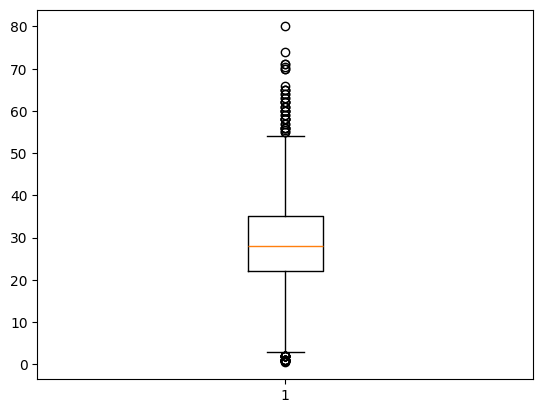

In [2680]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()

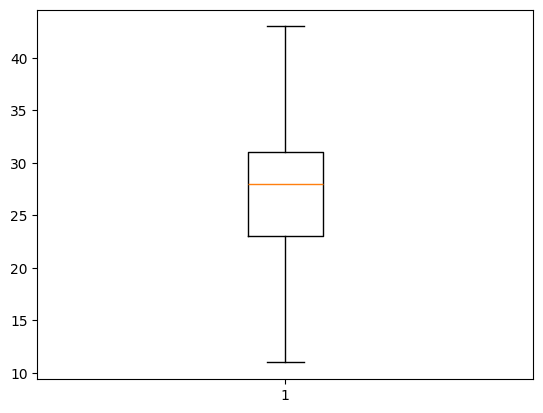

In [2681]:
df = df[(df['Age']>10) & (df['Age'] < 44)]
plt.boxplot(df['Age'])
plt.show()

## Preparamos el modelo

In [2682]:
caracteristicas = ['Age','Sex','Pclass']

X = df[caracteristicas]

y = df['Survived']

In [2683]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [2684]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [2685]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)

modelo.fit(X_train, y_train)

predit = modelo.predict(X_val)

accuracy = accuracy_score(y_val, predit)

print('Exactitud en el conjunto de validación:', accuracy)

Exactitud en el conjunto de validación: 0.8368794326241135


## Leemos el archivo de prueba

In [2686]:
test_data = pd.read_csv('test.csv')

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2687]:
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
test_data['Sex'] = test_data ['Sex'].map ({'male': 0, 'female': 1})
test_data['Embarked'] = test_data ['Embarked'].map ({'S': 0, 'C': 1, 'Q': 2})
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.1+ KB


/tmp/ipython-input-284398266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace = True)


## Creamos archivo

In [2688]:
X_val = test_data[caracteristicas]
X_val = scaler.transform(X_val)
predict = modelo.predict(X_val)
#Creamos modelo de envio
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predict})
output.to_csv('submission.csv', index=False)